In [1]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# function used to get question 1,2,3 print out in required format
def printOutput(output, question):
    # s str variable which will be used when printing out the answer
    asterisk = '***';
    # get the answer of question 1 print out
    if question == '1':
        ratio = output
        print ('Question 1')
        print ('%% of short trips=%.1f' % (ratio))
        print ('%s' % asterisk)
    # get the answer of question 2 print out
    elif question == '2':
        STAT = output[0]
        output = output[1]
 
        print ('Question 2 median distance %s'% STAT)
        print ('January: %.1f\n%s'% (output,asterisk))
    # get the ansert of question 3 print out
    elif question == '3':
        ratio = output[1]
        print ('Question 3\n%.1f%% of instances in \'tripdistance\' are abnormal! ' 
               '(normal range is between 1.2 and 4.5)\n***'% ratio)
        

In [3]:
#Answer to 1
# Reading the data into a DataFrame
# create a dataframe, filedata which store datas from the csv file
fileData   = pd.read_csv('clean-january.csv',encoding = 'ISO-8859-1')
# cerate a column in filedData, 'Short_Trip'
# in this column, any 'trip_distance' < 3 will return 1, else 0  
fileData['Short_Trip'] = [1 if x < 3 else 0 for x in fileData['trip_distance']]
#make a copy of fileData to data
data = fileData[['Short_Trip', 'trip_distance', 'passenger_count',
                    'payment_amount', 'duration']].copy()
# change the order and capitalize the first letter of each column name
data.columns = ['Short_Trip', 'Trip_distance', 'Passenger_count',
                    'Payment_amount', 'Duration']
# total number  of trips
total = data.shape[0]
# get the number of short trip
shortTrip = data.groupby('Short_Trip').size()[1]
# call printOutput function to get the final answer of this question print out
printOutput((shortTrip/total)*100, question = '1')


Question 1
% of short trips=71.3
***


In [4]:
#Answer to 2
# get the median of all 'trip distance'  
median_distance = data['Trip_distance'].median()
# get the median of all 'trip duration'
median_duration = data['Duration'].median()
# get answers print out in format
printOutput(['distance', median_distance], question = '2')
printOutput(['duration', median_duration], question = '2')

Question 2 median distance distance
January: 1.8
***
Question 2 median distance duration
January: 11.0
***


In [5]:
#Answer to 3
# a string vareiable which will be used in later comparison
feature = 'Trip_distance'
# get the number of records
records   = len(fileData)
# set the lower boundary and upper boundary
lower  = data[data[feature]<1.2]
higher = data[data[feature]>4.5]
# get the ratia of the numebr of abnormal 'trip disrtance'
# and print out the answer
ratio  = 100*(len(lower)+len(higher))/records
printOutput([feature,ratio], question='3')


Question 3
42.9% of instances in 'tripdistance' are abnormal! (normal range is between 1.2 and 4.5)
***


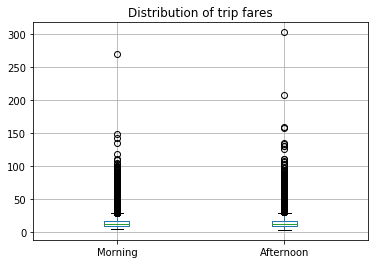

In [6]:
#Answer to 4
# convert str to datetime type in order to use them
fileData['pickup_datetime'] = pd.to_datetime(fileData['pickup_datetime'], format = '%d/%m/%y %H:%M')
# initialize 'morning' and 'afternoon' and set its index to datetime index
morning = afternoon = fileData.set_index('pickup_datetime')
# get trips started in the morning time range and assign to morning
morning = morning.between_time('07:00', '11:00').reset_index()
# get trips started in the afternoon time range and assign to afternoon
afternoon = afternoon.between_time('12:00', '15:00').reset_index()
# concat 'payment amount' of morning and afternoon and draw the plot, 1 boxplot for each
concatInfo = pd.concat([morning['payment_amount'] , afternoon['payment_amount']], axis = 1, keys = ['Morning', 'Afternoon'])
concatInfo.boxplot()
# set the title for the plot
plt.title('Distribution of trip fares')
plt.show()


In [7]:
#Answer to 5
# convert the 'pickup_datetime' and 'dropoff_datetime' to datetime type
# Assign them to tStart and tEnd respectively
tStart = pd.to_datetime(fileData['pickup_datetime'], format = '%d/%m/%y %H:%M')
tEnd= pd.to_datetime(fileData['dropoff_datetime'], format = '%d/%m/%y %H:%M')
# create a column called 'isPeak' to record wheather each trip start and finish with pick time
data['isPeak'] = [1 if (7 <= x <9 and 7<= y < 9 and startDay < 5 and endDay < 5) else 0 for x, 
                  y, startDay, endDay in zip(tStart.dt.hour, tEnd.dt.hour, tStart.dt.weekday, tEnd.dt.weekday)]
# get the total number of trip
total = data.shape[0]
# get the trips which start and finish with pick time
isPeak = data.groupby('isPeak').size()[1]
# get the percentage of peak trips
percentage = 100*isPeak/total
# output the answer
print('Question 5\n%% of peak hour trips=%.1f\n***'% percentage)


Question 5
% of peak hour trips=6.2
***


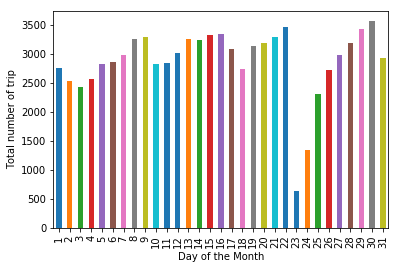

In [8]:
#Answer to 6
# get the 'day' of each 'pickip_datetime' and storing them in 
# a new column, 'dayofmonth'
data['dayofmonth'] = tStart.dt.day
# use groupby to groupby the data dataframe and assign it to 
# 'bygroup'
bygroup = data.groupby('dayofmonth')
# draw a bar plot, by counting the nuber of trips for each'day' of the month
# number of trips in each 'day' of the month, against the 'day' of the month
picture = bygroup['dayofmonth'].count().plot(kind = 'bar')
# set x, y labels
picture.set_ylabel("Total number of trip")
picture.set_xlabel("Day of the Month")
plt.show()


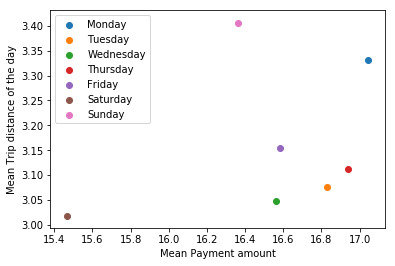

In [9]:
#Answer to 7
# get the the week day of the starting datetime of each trip
# and storing them in a new column 'dayofweek'
data['dayofweek'] = tStart.dt.weekday
# data is groupped by the 'dayofweek' and assign to 'bygroup' variable 
bygroup = data.groupby('dayofweek')
# get the name of days in the week, which will be used for the legend
dayinweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# loop for 7 times (7 days), for each loop, add mean trip distance of the 'day' against mean
# mean payment amount of the 'day' to the scatter plot.
for day in range(7):
    picture = plt.scatter(x = bygroup['Payment_amount'].mean()[day], y = bygroup['Trip_distance'].
                          mean()[day], label = dayinweek[day])
# add x, y labels and set the legend to upper left
plt.xlabel("Mean Payment amount")
plt.ylabel("Mean Trip distance of the day")
plt.legend(loc = 'upper left')


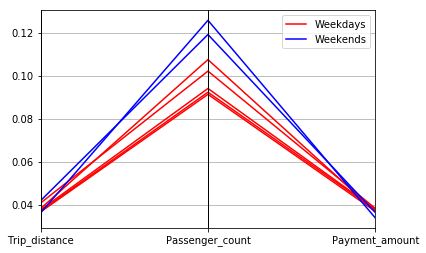

In [10]:
#Answer to 8
# import parallel_coordinates in order to plot for this question
from pandas.plotting import parallel_coordinates
# 'featureSet' stores features which will need for plotting
featureSet = ['Trip_distance','Passenger_count','Payment_amount']
# make a copy of 'data', so 'data' will not be changed, and can be used
# in later questions
data_copy = data.copy()
# loop through each 'feature' in the 'featureSet'
# get its normalised values and reassign to itself
for feature in featureSet:
    data_copy[feature] = (data_copy[feature] - data_copy[feature].min())/ (data_copy[feature].max() - data_copy[feature].min())

# the 'data_copy' is grouped by 'dayofweek', then get the mean of each feature of each each 'day' in the week
# and storing them in group
group = data_copy.groupby('dayofweek', as_index= False)[featureSet].mean()
# create a new column in 'group', called 'isweekday' to classify wheather the day is a weekday or weekend
group['isweekday'] = ['Weekdays' if x < 5 else 'Weekends' for x in group['dayofweek']]
# draw a parallel coordinates plot for all features in each day of the week (Monday - Sunday)
# and set red for weekdays and blue for weekends
parallel_coordinates(group[['Trip_distance','Passenger_count','Payment_amount', 'isweekday']], 'isweekday', color=['r','b'])
plt.show()


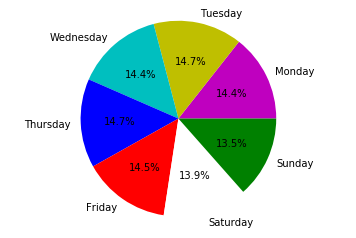

In [11]:
#Answer to 9
# create a new column 'minutes_trevelling', for each trip,
# it equals 'Passenger_count'*'Duration'
data['minutes_travelling'] = data['Passenger_count'] * data['Duration']
# 'data' is grouped by the column'dayofweek', storing in variable'bygroup'
bygroup = data.groupby('dayofweek')
# set colors for each day of the week
colors = ['m','y','c','b','r','w','g']
# draw a pie plot, in terms of the mean of'minutes_travelling' for each day of the week
plt.pie(bygroup['minutes_travelling'].mean(), explode = None, labels = dayinweek, colors = colors, autopct = '%1.1f%%')
# set all axis of the pie plot to be equal
plt.axis('equal')
plt.show()


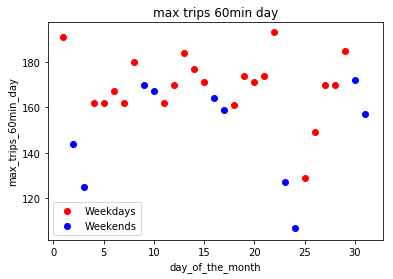

In [12]:
#Answer to 10
# creating a new dataframe, 'data_copy2' 
# copy columns from 'data_copy' and creating other columns for later use
data_copy2 = data_copy[['Duration', 'dayofmonth']].copy()
data_copy2['pickup_datetime']= tStart
data_copy2['isweekday'] = [1 if x<5 else 0 for x in data['dayofweek']]

# get 'data_copy2' grouped by 'dayofmonth'
bygroup = data_copy2.groupby('dayofmonth')

# creating list vairables to store data later
weekday = list()
weekend = list()
max_trip_day = list()
max_trip_weekday = list()
max_trip_weekend = list()


# real thing begins here!

# looping through bygroup in terms of 'day, group' (trips started on each day of the monday: from day 1 - 31)
for day, group in bygroup:
    # lists used to store the start and end time of each trip in the current 'group'
    start_list = list()
    end_list = list()
    
    # 'n_trips' stores the total number of trips started in the day of the month
    n_trips = group['pickup_datetime'].shape[0]
    
    # looping through each trip and store its start and finish time (in munite) into the corresponding list
    for i in range(n_trips):
        hold_start = group.iloc[i]['pickup_datetime'].hour*60 + group.iloc[i]['pickup_datetime'].minute
        start_list.append(hold_start)
        end_list.append(hold_start+group.iloc[i]['Duration'])
 
    
    # initialise 'max_count' to 0, which keep records of the current maximum number of trips started and finished
    # within 60 mins interval
    max_count = 0
    
    # loop through every minute wihin range 00:00 - 22:59 in minute
    for i in range(1, 23*60):
        # 'count' tracks the number of trips started and finished within current 60 minute interval
        count = 0
        
        # loop through each trip in the current group, if the trip satisfy the condtion,  add 1 to 'count'
        for trip in range(n_trips):
        
            if (i <= start_list[trip] < i+60
               and i <= end_list[trip] < i+60):
    
                count+=1
        # after looping each trip in the group, check if 'count' is greater than the current 'max_count'
        # if yes, make 'count' to be the new 'max_count'
        if count > max_count:
            max_count = count

    # check wheather the day of the month is a weekday, then append the 'day', 'max_count' respectively to 
    #its corresponding list.
    if group.iloc[0]['isweekday'] == 1:
        weekday.append(day)
        max_trip_weekday.append(max_count)
        
    else:
        weekend.append(day)
        max_trip_weekend.append(max_count)
# draw scatter plot for 'weekday' and 'weekend'       
plt.scatter(x = weekday, y = max_trip_weekday, label = 'Weekdays',color='r')
plt.scatter(x = weekend, y = max_trip_weekend, label = 'Weekends',color='b')
# add title and labels for the plot
plt.title('max trips 60min day')
plt.xlabel("day_of_the_month")
plt.ylabel("max_trips_60min_day")
# set the positon of the legend
plt.legend(loc='best')
plt.show()
                      